In [5]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import threading as trd


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading csv samples
dataa = pd.read_csv('../DataSets/training-a/REFERENCE.csv')
datab = pd.read_csv('../DataSets/training-b/REFERENCE.csv')
datac = pd.read_csv('../DataSets/training-c/REFERENCE.csv')
datad = pd.read_csv('../DataSets/training-d/REFERENCE.csv')
datae = pd.read_csv('../DataSets/training-e/REFERENCE.csv')
dataf = pd.read_csv('../DataSets/training-f/REFERENCE.csv')


dataf.head(5)

In [ ]:
#Validating samples for selecting unnormal heartbits

validDataa = dataa[dataa.iloc[:,1]<0]
validDatab = datab[datab.iloc[:,1]<0]
validDatac = datac[datac.iloc[:,1]<0]
validDatad = datad[datad.iloc[:,1]<0]
validDatae = datae[datae.iloc[:,1]<0]
validDataf = dataf[dataf.iloc[:,1]<0]

validDatac.head(5)

In [13]:
#testing rmse feature for sample
y, sr = librosa.load('../DataSets/training-b/b0007.wav',offset=5, duration=8)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps3 = librosa.stft(y)

ps2 = librosa.feature.rmse(y=y)

ps3.shape

(1025, 130)

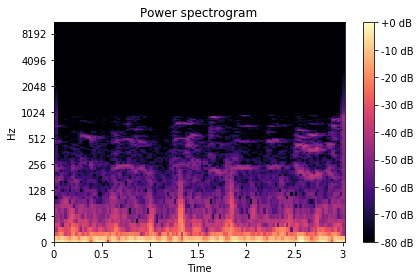

In [17]:
#ploting test 
#librosa.display.waveplot(ps3, y_axis='mel', x_axis='time')
librosa.display.specshow(librosa.amplitude_to_db(ps3,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [37]:
# Dataset new for Import

Da = [] 
Db = []
Dc = []
Dd = []
De = []
Df = []


#for row in data.itertuples():
#    for i in np.arange(0,30,2.97):
#            y, sr = librosa.load('../DataSets/training-a/' + row[1] + '.wav',offset=i, duration=2.97)
#            ps = librosa.feature.melspectrogram(y=y, sr=sr)
#            print(row[1])
#            if ps.shape != (128, 128): break
#            D.append(ps)


########Defining workers for parallel proccessing 
# 6 thread 


def workerA(arr):
    for row in arr.itertuples():
        for i in np.arange(0,30,2.97):
            y, sr = librosa.load('../DataSets/training-a/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.rmse(y=y)
            print(row[1]+"  shape:  "+str(ps.shape[1]))
            if ps.shape != (1, 128): break
            Da.append(ps)
            print(len(Da))
    return Da

                
def workerB(arr):
    for row in arr.itertuples():
        for i in np.arange(0,7,2.97):
            y, sr = librosa.load('../DataSets/training-b/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.rmse(y=y)
            print(row[1]+"  shape:  "+str(ps.shape[1]))
            if ps.shape != (1, 128): break
            Db.append(ps)
            print(len(Db))
    return Db

def workerC(arr):
    for row in arr.itertuples():
        for i in np.arange(0,18,2.97):
            y, sr = librosa.load('../DataSets/training-c/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.rmse(y=y)
            print(row[1]+"  shape:  "+str(ps.shape[1]))
            if ps.shape != (1, 128): break
            Dc.append(ps)
            print(len(Dc))
    return Dc

def workerD(arr):
    for row in arr.itertuples():
        for i in np.arange(0,8,2.97):
            y, sr = librosa.load('../DataSets/training-d/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.rmse(y=y)
            print(row[1]+"  shape:  "+str(ps.shape[1]))
            if ps.shape != (1, 128): break
            Dd.append(ps)
            print(len(Dd))
    return Dd


def workerE(arr):
    for row in arr.itertuples():
        for i in np.arange(0,17,2.97):
            y, sr = librosa.load('../DataSets/training-e/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.rmse(y=y)
            print(row[1]+"  shape:  "+str(ps.shape[1]))
            if ps.shape != (1, 128): break
            De.append(ps)
            print(len(De))
    return De

def workerF(arr):
    for row in arr.itertuples():
        for i in np.arange(0,28,2.97):
            y, sr = librosa.load('../DataSets/training-f/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.rmse(y=y)
            print(row[1]+"  shape:  "+str(ps.shape[1]))
            if ps.shape != (1, 128): break
            Df.append(ps)
            print(len(Df))
    return Df


#defining threads

ta = trd.Thread(target=workerA, args=(validDataa,))
tb = trd.Thread(target=workerB, args=(validDatab,))
tc = trd.Thread(target=workerC, args=(validDatac,))
td = trd.Thread(target=workerD, args=(validDatad,))
te = trd.Thread(target=workerE, args=(validDatae,))
tf = trd.Thread(target=workerF, args=(validDataf,))

ta.start()
tb.start()
tc.start()
td.start()
te.start()
tf.start()     
    
    

a0007  shape:  1077
1
a0009  shape:  1077
2
a0011  shape:  1077
3
a0012  shape:  1077
4
a0016  shape:  1077
5
a0019  shape:  1077
6
a0025  shape:  1077
7
a0027  shape:  1077
8
a0028  shape:  1077
9
a0029  shape:  1077
10
a0032  shape:  1077
11
a0035  shape:  1033
a0038  shape:  1077
12
a0049  shape:  1077
13
a0050  shape:  1077
14
a0053  shape:  1077
15
a0055  shape:  1077
16
a0068  shape:  1077
17
a0069  shape:  1077
18
a0070  shape:  1077
19
a0071  shape:  1061
a0080  shape:  1077
20
a0081  shape:  1077
21
a0085  shape:  1077
22
a0086  shape:  1077
23
a0088  shape:  1077
24
a0091  shape:  1077
25
a0093  shape:  1077
26
a0094  shape:  1077
27
a0102  shape:  1077
28
a0105  shape:  1077
29
a0106  shape:  1077
30
a0108  shape:  1077
31
a0109  shape:  1077
32
a0118  shape:  1077
33
a0125  shape:  1077
34
a0127  shape:  1077
35
a0129  shape:  1077
36
a0136  shape:  1077
37
a0139  shape:  1077
38
a0140  shape:  1077
39
a0141  shape:  1077
40
a0153  shape:  1077
41
a0154  shape:  1077
42
a01

In [38]:
#testing imported array
print("Number of samples: ", len(Da))
Da[15].shape

Number of samples:  111


(1, 1077)

In [257]:
#merge all samples in one list 
dataset = []
dataset.extend(Da)
dataset.extend(Db)
dataset.extend(Dc)
dataset.extend(Dd)
dataset.extend(De)
dataset.extend(Df)

#shuffle data set for better results
random.shuffle(dataset)
len(dataset)

7235

In [258]:
#select 7000 data as training samples

train = dataset[:7000]
test = dataset[7000:]
train[1].shape

(1, 128)

In [259]:
# Reshape for Kmeans input

#X_train = np.array([x.reshape( (137856) ) for x in train])
#X_test = np.array([x.reshape( (128, 128, 1) ) for x in test])


X_train = np.array([x.reshape( (128) ) for x in train])

X_train[0].shape
X_train.shape

(7000, 128)

In [260]:
#X_train.shape
#clustering = DBSCAN(eps=5, min_samples=6).fit(X_train)

####Kmeans classifier

cluster2 = KMeans(n_clusters=6, random_state=0).fit(X_train)
cluster2.labels_

4

In [261]:
#cluster2.labels_

##make labels seperate by color for plotting
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('r')
        elif l==1:
            cols.append('b')
        elif l==2:
            cols.append('g')
        elif l==3:
            cols.append('y')
        elif l==4:
            cols.append('c')
        else:
            cols.append('k')
    return cols


color = pltcolor(cluster2.labels_)
len(color)


7000

In [1]:
#reducing feature border dimentions to two for ploting
#This will take a lots of timeeeee

embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X_train)

#X = X_transformed[:,0]
#Y = X_transformed[:,1]
#plotting clusters

plt.scatter(X_transformed[:,0] , X_transformed[:,1],c = color)

NameError: name 'MDS' is not defined

In [204]:
len(De)

3818

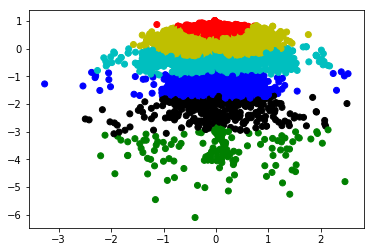

In [263]:
plt.scatter(X_transformed[:,0] , X_transformed[:,1],c = color)

In [253]:
ll = list(cluster2.labels_)
ll.count(5)
ll2 = np.array(ll)
ll

[2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 3,
 2,
 3,


In [264]:
#save the result array
np.save('X-transform2-shuffle-enabled',X_transformed)